### Lectura de datos

In [48]:
import pandas as pd
# import px as px

# Cambia 'tu_archivo.csv' por la ruta de tu archivo CSV
archivo_csv = 'Data/bans.csv'
dfBans = pd.read_csv(archivo_csv)


archivo_csv = 'Data/gold.csv'
dfGold = pd.read_csv(archivo_csv)

archivo_csv = 'Data/kills.csv'
dfKills = pd.read_csv(archivo_csv)

archivo_csv = 'Data/monsters.csv'
dfMonsters = pd.read_csv(archivo_csv)


archivo_csv = 'Data/structures.csv'
dfStructures = pd.read_csv(archivo_csv)


archivo_csv = 'Data/matchinfo.csv'
dfMarchinfo = pd.read_csv(archivo_csv)


archivo_csv = 'Data/LeagueofLegends.csv'
dfLeagueofLegends = pd.read_csv(archivo_csv)

In [49]:
dfLeagueofLegends.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [50]:
dfLeagueofLegends.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

### Estudio de los datos

In [51]:
print(dfMarchinfo.iloc[0]['blueTopChamp'])

Irelia


In [52]:
# Campeones con mas winrate
champs = {}
winrate2 = dfMarchinfo.copy()
winrate = {}
# Define tu función
def mi_funcion(row):
    blue_columns = ['blueTopChamp', 'blueJungleChamp', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp']
    red_columns = ['redTopChamp', 'redJungleChamp', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp']

    for col in blue_columns:
        if row[col] in champs:
            champs[row[col]] += 1
            if row['bResult'] == 1:
                if row[col] in winrate:
                    winrate[row[col]] += 1
                else:
                    winrate[row[col]] = 1
        else:
            champs[row[col]] = 1

    for col in red_columns:
        if row[col] in champs:
            champs[row[col]] += 1
            if row['rResult'] == 1:
                if row[col] in winrate:
                    winrate[row[col]] += 1
                else:
                    winrate[row[col]] = 1
        else:
            champs[row[col]] = 1

# Aplica la función a todas las filas utilizando apply()
winrate2.apply(mi_funcion, axis=1)
winrate

{'Irelia': 228,
 'Rengar': 320,
 'Fizz': 181,
 'Sivir': 883,
 'Annie': 148,
 'Gnar': 646,
 'Janna': 464,
 'JarvanIV': 600,
 'Lulu': 640,
 'Corki': 851,
 'Thresh': 1005,
 'Renekton': 290,
 'Azir': 492,
 'Caitlyn': 565,
 'Kassadin': 213,
 'Orianna': 629,
 'Nami': 295,
 'Morgana': 314,
 'Graves': 672,
 'Vi': 42,
 'Lissandra': 291,
 'Sion': 64,
 'Kalista': 712,
 'Blitzcrank': 112,
 'Leblanc': 432,
 'Rumble': 571,
 'Zed': 203,
 'Maokai': 947,
 'LeeSin': 686,
 'Xerath': 60,
 'Tristana': 424,
 'KogMaw': 276,
 'Ahri': 341,
 'RekSai': 1125,
 'Jinx': 117,
 'Ezreal': 695,
 'Jax': 111,
 'Nidalee': 418,
 'Leona': 76,
 'Nunu': 78,
 'Braum': 1023,
 'Veigar': 19,
 'Hecarim': 200,
 'Kennen': 197,
 'Sejuani': 291,
 'Karthus': 20,
 'Yasuo': 52,
 'Lucian': 841,
 'Gragas': 1339,
 'Vayne': 101,
 'Nautilus': 569,
 'Urgot': 54,
 'Zac': 177,
 'Chogath': 167,
 'Vladimir': 299,
 'Draven': 31,
 'Cassiopeia': 485,
 'Alistar': 799,
 'Viktor': 545,
 'Malphite': 72,
 'Varus': 769,
 'Ryze': 444,
 'Bard': 354,
 'Ekko':

In [53]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
df = pd.DataFrame([champs, winrate]).T

# Renombrar las columnas
df.columns = ['picks', 'wins']
df['winrate'] = df['wins'] / (df['picks']) * 100
df.fillna(0, inplace=True)
df.sort_values('picks', ascending=False, inplace=True)
print(df)

               picks    wins    winrate
Gragas        2555.0  1339.0  52.407045
RekSai        2330.0  1125.0  48.283262
Braum         2115.0  1023.0  48.368794
Elise         2065.0  1044.0  50.556901
Thresh        1923.0  1005.0  52.262090
...              ...     ...        ...
MonkeyKing       4.0     1.0  25.000000
Volibear         4.0     0.0   0.000000
Garen            2.0     0.0   0.000000
FiddleSticks     2.0     1.0  50.000000
Tryndamere       1.0     0.0   0.000000

[140 rows x 3 columns]


In [54]:
df_bans = dfBans.copy()
bans = {}
def contar_bans(x):
    for i in range(1, 6):  # Itera sobre los números de las columnas
        ban_col = f'ban_{i}'  # Nombre de la columna
        if not pd.isnull(x[ban_col]):  # Verifica si el valor no es NaN
            if x[ban_col] in bans:
                bans[x[ban_col]] += 1
            else:
                bans[x[ban_col]] = 1

df_bans.apply(contar_bans, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
15235    None
15236    None
15237    None
15238    None
15239    None
Length: 15240, dtype: object

In [55]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
dfB = pd.DataFrame([bans]).T

# Renombrar las columnas
dfB.columns = ['bans']
dfB['banratio'] = dfB['bans'] / 7621 * 100
dfB.sort_values('banratio', ascending=False, inplace=True)
print(dfB)

              bans   banratio
Leblanc       2477  32.502296
Kalista       1959  25.705288
Ryze          1896  24.878625
Elise         1577  20.692822
Shen          1571  20.614093
...            ...        ...
FiddleSticks     2   0.026243
Fiddlesticks     2   0.026243
Garen            2   0.026243
Amumu            1   0.013122
Volibear         1   0.013122

[137 rows x 2 columns]


In [56]:
result2 = pd.merge(df, dfB, left_index=True, right_index=True)
result2_reset_index = result2.reset_index()
result2

,picks,wins,winrate,bans,banratio
Gragas,2555.0,1339.0,52.407045,956,12.544286
RekSai,2330.0,1125.0,48.283262,966,12.675502
Braum,2115.0,1023.0,48.368794,618,8.109172
Elise,2065.0,1044.0,50.556901,1577,20.692822
Thresh,1923.0,1005.0,52.262090,1140,14.958667
...,...,...,...,...,...
Heimerdinger,6.0,3.0,50.000000,4,0.052487
MasterYi,6.0,2.0,33.333333,4,0.052487
Volibear,4.0,0.0,0.000000,1,0.013122
Garen,2.0,0.0,0.000000,2,0.026243


In [57]:
import plotly.express as px
result2 = result2.head(10)
fig = px.scatter_3d(result2,
      x='picks',
      y ='wins',
      z= 'bans',
      color = result2.index
)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
import matplotlib.pyplot as plt

p_df = df.head(10)
p_df = p_df['winrate']
p_df
# Crea el gráfico de barras horizontal
plt.barh(p_df.index, p_df, color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Indice')
plt.title('Gráfico de Barras Horizontal con una sola columna')
plt.show()

In [ ]:
# Campeones con mas winrate
s = {}
winrate3 = dfMarchinfo.copy()
winrate_players = {}
# Define tu función
def mi_funcion(row):
        if row['blueTop'] in s: # No esta en el resgistros de campeones
            s[row['blueTop']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueTop'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueTop']] += 1
                else:
                    winrate_players[row['blueTop']] = 1
        else:
            s[row['blueTop']] = 1

        if row['blueJungle'] in s: # No esta en el resgistros de campeones
            s[row['blueJungle']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueJungle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueJungle']] += 1
                else:
                    winrate_players[row['blueJungle']] = 1
        else:
            s[row['blueJungle']] = 1

        if row['blueMiddle'] in s: # No esta en el resgistros de campeones
            s[row['blueMiddle']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueMiddle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueMiddle']] += 1
                else:
                    winrate_players[row['blueMiddle']] = 1
        else:
            s[row['blueMiddle']] = 1

        if row['blueADC'] in s: # No esta en el resgistros de campeones
            s[row['blueADC']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueADC'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueADC']] += 1
                else:
                    winrate_players[row['blueADC']] = 1
        else:
            s[row['blueADC']] = 1

        if row['blueSupport'] in s: # No esta en el resgistros de campeones
            s[row['blueSupport']] += 1
            if row['bResult'] == 1: # Si ganaron
                if row['blueSupport'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['blueSupport']] += 1
                else:
                    winrate_players[row['blueSupport']] = 1
        else:
            s[row['blueSupport']] = 1

        if row['redTop'] in s: # No esta en el resgistros de campeones
            s[row['redTop']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redTop'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redTop']] += 1
                else:
                    winrate_players[row['redTop']] = 1
        else:
            s[row['redTop']] = 1

        if row['redJungle'] in s: # No esta en el resgistros de campeones
            s[row['redJungle']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redJungle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redJungle']] += 1
                else:
                    winrate_players[row['redJungle']] = 1
        else:
            s[row['redJungle']] = 1

        if row['redMiddle'] in s: # No esta en el resgistros de campeones
            s[row['redMiddle']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redMiddle'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redMiddle']] += 1
                else:
                    winrate_players[row['redMiddle']] = 1
        else:
            s[row['redMiddle']] = 1

        if row['redADC'] in s: # No esta en el resgistros de campeones
            s[row['redADC']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redADC'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redADC']] += 1
                else:
                    winrate_players[row['redADC']] = 1
        else:
            s[row['redADC']] = 1

        if row['redSupport'] in s: # No esta en el resgistros de campeones
            s[row['redSupport']] += 1
            if row['rResult'] == 1: # Si ganaron
                if row['redSupport'] in winrate_players: # No esta en el registro de ganadores
                    winrate_players[row['redSupport']] += 1
                else:
                    winrate_players[row['redSupport']] = 1
        else:
            s[row['redSupport']] = 1

# Aplica la función a todas las filas utilizando apply()
winrate3.apply(mi_funcion, axis=1)

In [ ]:
# Crear el DataFrame a partir de los diccionarios y transponerlo
df2 = pd.DataFrame([s, winrate_players]).T


# Renombrar las columnas
df2.columns = ['partidos', 'wins']

df2['winrate'] = df2['wins'] / df2['partidos'] * 100
df2.fillna(0, inplace=True)
df2.sort_values('winrate', ascending=False, inplace=True)

print(df2)

In [ ]:
from mrjob.job import MRJob
import pandas as pd

class MyMRJob(MRJob):

    def mapper(self, _, line):
        row = pd.read_csv('Data/matchinfo.csv')
        results = {}

        for col in ['blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport',
                    'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport']:
            if row[col] in results:
                results[row[col]] += 1
            else:
                results[row[col]] = 1

        yield None, results

    def reducer(self, _, results):
        total_result = {}
        for result in results:
            for champ, count in result.items():
                if champ in total_result:
                    total_result[champ] += count
                else:
                    total_result[champ] = count
        yield None, total_result

if __name__ == '__main__':
    MyMRJob.run()


### Preprocesado

In [ ]:
df15 = dfLeagueofLegends.copy()

#### Torres tiradas toplane, botlnae, midlane y inibidores

In [ ]:
df_t_pos = dfStructures.copy()
df_t_pos = df_t_pos[df_t_pos['Time'] < 15]
df_t_pos.drop('Time', inplace=True, axis=1)

df_t_pos = df_t_pos.groupby(['Address','Team','Lane']).count().reset_index()
print(df_t_pos.head())

In [ ]:
df15['bTopTowers'] = 0
df15['bMiddleTowers'] = 0
df15['bBotTowers'] = 0

df15['redTopTowers'] = 0
df15['redMiddleTowers'] = 0
df15['redBotTowers'] = 0

def recorrer(row):   
    aux = df_t_pos[df_t_pos['Address']==row['Address']]
    if not aux.empty:
        for index, row2 in aux.iterrows():
            v = row2['Type']
            if row2['Team'] == 'bTowers':
                if row2['Lane'] == 'TOP_LANE':
                    row['bTopTowers'] = v
                if row2['Lane'] == 'MID_LANE':
                    row['bMiddleTowers'] = v
                if row2['Lane'] == 'BOT_LANE':
                    row['bBotTowers'] = v
            else:
                if row2['Lane'] == 'TOP_LANE':
                    row['redTopTowers'] = v
                if row2['Lane'] == 'MID_LANE':
                    row['redMiddleTowers'] = v
                if row2['Lane'] == 'BOT_LANE':
                    row['redBotTowers'] = v
    return row
    
    
df15 = df15.apply(recorrer, axis=1)
df15.head()  
    

#### Filtrar oro a min 15

In [ ]:
def string_a_int_array(s):
    # Removemos los corchetes al principio y al final
    s = s.strip('[]')
    # Dividimos los valores por las comas y eliminamos los espacios en blanco alrededor de cada valor
    valores = [int(valor.strip()) for valor in s.split(',')]
    return valores

df15['golddiff'] = df15['golddiff'].map(lambda x: string_a_int_array(x)[15])
df15['goldblue'] = df15['goldblue'].map(lambda x: string_a_int_array(x)[15])
df15['goldred'] = df15['goldred'].map(lambda x: string_a_int_array(x)[15])

df15['goldblueADC'] = df15['goldblueADC'].map(lambda x: string_a_int_array(x)[15])
df15['goldredJungle'] = df15['goldredJungle'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueSupport'] = df15['goldblueSupport'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueTop'] = df15['goldblueTop'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueMiddle'] = df15['goldblueMiddle'].map(lambda x: string_a_int_array(x)[15])

df15['goldredADC'] = df15['goldredADC'].map(lambda x: string_a_int_array(x)[15])
df15['goldredSupport'] = df15['goldredSupport'].map(lambda x: string_a_int_array(x)[15])
df15['goldredTop'] = df15['goldredTop'].map(lambda x: string_a_int_array(x)[15])
df15['goldredMiddle'] = df15['goldredMiddle'].map(lambda x: string_a_int_array(x)[15])
df15['goldblueJungle'] = df15['goldblueJungle'].map(lambda x: string_a_int_array(x)[15])

df15 = df15.rename(columns={'golddiff': 'golddiff15', 'goldblue': 'goldblue15', 'goldred': 'goldred15', 'goldblueADC': 'goldblueADC15', 'goldredJungle': 'goldredJungle15', 'goldblueSupport': 'goldblueSupport15', 'goldblueTop': 'goldblueTop15', 'goldblueMiddle': 'goldblueMiddle15', 'goldredADC': 'goldredADC15', 'goldredSupport': 'goldredSupport15', 'goldredTop': 'goldredTop15', 'goldredMiddle': 'goldredMiddle15', 'goldblueJungle': 'goldblueJungle15'})
df15.head()

#### First kill

In [ ]:
import json

df15['BFirstKill'] = 0
df15['RFirstKill'] = 0
def get_first_kill(x):
    a = resultado[resultado['Address'] == x['Address']]
    if not a.empty:
        team = a.iloc[0]['Team']
        if team == 'bKills':
            x['BFirstKill'] = 1
        else:
            x['RFirstKill'] = 1
    return x


indices_min_edad = dfKills.groupby('Address')['Time'].idxmin()
resultado = dfKills.loc[indices_min_edad]
resultado = resultado[resultado['Time'] < 15]
resultado = resultado[['Address', 'Team', 'Time']]
df15 = df15.apply(get_first_kill, axis=1)


In [ ]:
df15.head()

#### Baron, heraldo, y dragones

In [ ]:
dfM15 = dfMonsters[dfMonsters['Time']<15].drop('Time',axis=1).groupby(['Address','Team']).count().reset_index()

df15['bDragons15'] = 0
df15['rDragons15'] = 0
df15['bHeralds15'] = 0
df15['rHeralds15'] = 0
#dfPrepro.drop('bBarons',axis=1,inplace=True)
#dfPrepro.drop('rBarons',axis=1,inplace=True)

def getMonster(row):
    aux = dfM15[dfM15['Address']==row['Address']]
    if not aux.empty:
        for index, row2 in aux.iterrows():
            v = row2['Type']
            if row2['Team'] == 'bDragons':
                row['bDragons15'] = v
            elif row2['Team'] == 'rDragons':
                row['rDragons15'] = v
            elif row2['Team'] == 'bHeralds':
                row['bHeralds15'] = v
            elif row2['Team'] == 'rHeralds':
                row['rHeralds15'] = v
    return row

df15=df15.apply(getMonster,axis=1)

In [ ]:
df15.head()

#### Kills por posicion

In [ ]:
dfKills2 = dfKills[dfKills['Time']<15].drop(['Time','Team','Assist_1','Assist_3','Assist_2','Assist_4','x_pos','y_pos'],axis=1)
dfKills2 = dfKills2.groupby(['Address','Killer']).count().reset_index()
dfKills2['Killer'] = dfKills2['Killer'].str.split(expand=True)[1]
dfKills2

In [ ]:
df15['blueTopKills'] = 0
df15['blueJungleKills'] = 0
df15['blueMidKills'] = 0
df15['blueADCKills'] = 0
df15['blueSupportKills'] = 0
df15['redTopKills'] = 0
df15['redJungleKills'] = 0
df15['redMidKills'] = 0
df15['redADCKills'] = 0
df15['redSupportKills'] = 0

In [ ]:
info_c=[['blueTop', 'blueTopKills'], ['blueJungle', 'blueJungleKills'], ['blueMiddle', 'blueMidKills'], ['blueADC', 'blueADCKills'], ['blueSupport', 'blueSupportKills'], ['redTop', 'redTopKills'], ['redJungle', 'redJungleKills'], ['redMiddle', 'redMidKills'], ['redADC', 'redADCKills'], ['redSupport', 'redSupportKills']]
def getKills(row):
    aux = dfKills2[dfKills2['Address'] == row['Address']]
    for x,y in info_c:
        kills = aux[dfKills2['Killer'] == row[x]]
        if not kills.empty:
            row[y] = kills['Victim'].iloc[0]
    return row

In [ ]:
df15 = df15.apply(getKills,axis=1)
df15.head()

In [ ]:
dfDeath2 = dfKills[dfKills['Time']<15].drop(['Time','Team','Assist_1','Assist_3','Assist_2','Assist_4','x_pos','y_pos'],axis=1)
dfDeath2 = dfDeath2.groupby(['Address','Victim']).count().reset_index()
dfDeath2['Victim'] = dfDeath2['Victim'].str.split(expand=True)[1]
dfDeath2

In [ ]:
df15['blueTopDeath'] = 0
df15['blueJungleDeath'] = 0
df15['blueMidDeath'] = 0
df15['blueADCDeath'] = 0
df15['blueSupportDeath'] = 0
df15['redTopDeath'] = 0
df15['redJungleDeath'] = 0
df15['redMidDeath'] = 0
df15['redADCDeath'] = 0
df15['redSupportDeath'] = 0

In [ ]:
info_c=[['blueTop', 'blueTopDeath'], ['blueJungle', 'blueJungleDeath'], ['blueMiddle', 'blueMidDeath'], ['blueADC', 'blueADCDeath'], ['blueSupport', 'blueSupportDeath'], ['redTop', 'redTopDeath'], ['redJungle', 'redJungleDeath'], ['redMiddle', 'redMidDeath'], ['redADC', 'redADCDeath'], ['redSupport', 'redSupportDeath']]
def getDeaths(row):
    aux = dfDeath2[dfDeath2['Address'] == row['Address']]
    for x,y in info_c:
        kills = aux[dfDeath2['Victim'] == row[x]]
        if not kills.empty:
            row[y] = kills['Killer'].iloc[0]
    return row

In [ ]:
df15 = df15.apply(getDeaths,axis=1)
df15.head()

#### Eliminacion de columnas no necesarias

In [ ]:
df15.columns

In [ ]:
c_validas = [
       'golddiff15', 

       'goldblue15',
       'goldred15',

       'goldblueTop15', 'goldblueJungle15','goldblueMiddle15', 'goldblueADC15','goldblueSupport15',
       'goldredTop15','goldredJungle15','goldredMiddle15','goldredADC15', 'goldredSupport15',

       'bTopTowers', 'bMiddleTowers', 'bBotTowers', 
       'redTopTowers','redMiddleTowers', 'redBotTowers', 

       'BFirstKill', 'RFirstKill',

       'bDragons15', 'rDragons15', 
       'bHeralds15', 'rHeralds15', 

       'blueTopKills','blueJungleKills', 'blueMidKills', 'blueADCKills', 'blueSupportKills',
       'redTopKills', 'redJungleKills', 'redMidKills', 'redADCKills','redSupportKills',

       'blueTopDeath', 'blueJungleDeath', 'blueMidDeath','blueADCDeath', 'blueSupportDeath',  
       'redTopDeath', 'redJungleDeath','redMidDeath', 'redADCDeath', 'redSupportDeath',

       'bResult']

dfFinal = df15[c_validas]

In [ ]:
len(c_validas)

In [ ]:
dfFinal.to_csv('./Data/datosPreprocesados.csv', index=False)

### Creacion de los modelos

In [59]:
import pandas as pd
df = pd.read_csv('./Data/datosPreprocesados.csv')
df.dtypes

golddiff15           int64
goldblue15           int64
goldred15            int64
goldblueTop15        int64
goldblueJungle15     int64
goldblueMiddle15     int64
goldblueADC15        int64
goldblueSupport15    int64
goldredTop15         int64
goldredJungle15      int64
goldredMiddle15      int64
goldredADC15         int64
goldredSupport15     int64
bTopTowers           int64
bMiddleTowers        int64
bBotTowers           int64
redTopTowers         int64
redMiddleTowers      int64
redBotTowers         int64
BFirstKill           int64
RFirstKill           int64
bDragons15           int64
rDragons15           int64
bHeralds15           int64
rHeralds15           int64
blueTopKills         int64
blueJungleKills      int64
blueMidKills         int64
blueADCKills         int64
blueSupportKills     int64
redTopKills          int64
redJungleKills       int64
redMidKills          int64
redADCKills          int64
redSupportKills      int64
blueTopDeath         int64
blueJungleDeath      int64
b

#### Dividir los datos en entrenamiento y prueba

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(['bResult'], axis=1) # Variables independientes
y = df['bResult'] # Variable objetivo

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=33)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

class_names = np.unique(y_train)
s_class_names = ['Red Win','Blue Win']
feature_names = X.columns.tolist()

In [61]:
acc_dict = {}

#### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
modelos = [GaussianNB(), BernoulliNB()]
best_modelos_id=-1
best_accuracy=0
for i,model in enumerate(modelos):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy = np.mean(y_pred == y_val)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_modelos_id=i

best_model = modelos[best_modelos_id]
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)
accuracy = np.mean(y_pred == y_val)
print(f'BEST GAUSIAN NAIVE -> {modelos[best_modelos_id]}\nAccuracy: {accuracy}')
acc_dict['GN'] = accuracy

BEST GAUSIAN NAIVE -> BernoulliNB()
Accuracy: 0.7155737704918033


#### Decision tree

FINAL TREE params:
   -MAX_DEPTH: 5
   -BEST_CRITERION: gini
Accuracy: 0.7327868852459016


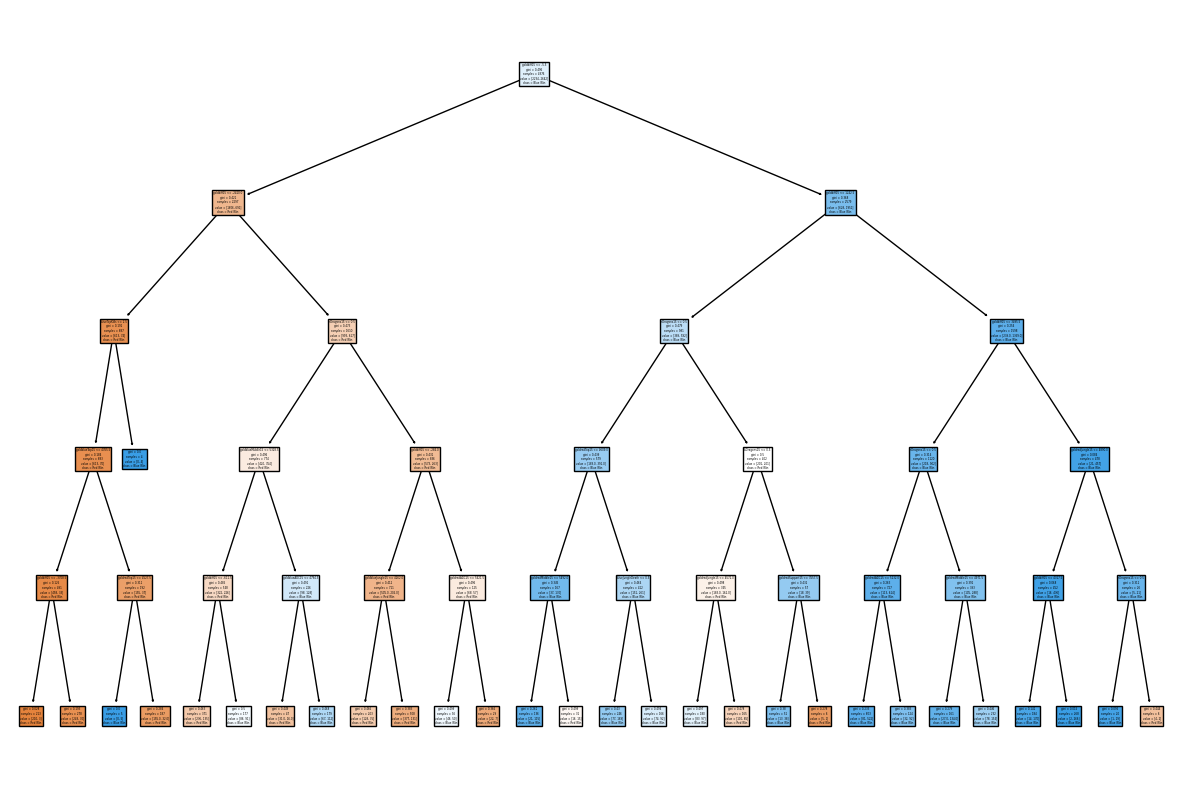

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
best_depth = 0
best_accuracy = 0

for i in range(1,15):
    tree = DecisionTreeClassifier(random_state=33,max_depth=i) 
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = i

best_accuracy = 0
options = ["gini", "entropy", "log_loss"]
best_option = -1

for i,op in enumerate(options):
    tree = DecisionTreeClassifier(random_state=33,max_depth=best_depth, criterion=op) 
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_option = i


tree_final = DecisionTreeClassifier(random_state=33,max_depth=best_depth, criterion=options[best_option])
tree_final.fit(X_train, y_train)

y_predfinal = tree_final.predict(X_val)
accuracy2 = accuracy_score(y_val, y_predfinal)
print(f'FINAL TREE params:\n   -MAX_DEPTH: {best_depth}\n   -BEST_CRITERION: {options[best_option]}\nAccuracy: {accuracy2}')
acc_dict['Tree'] = accuracy2
plt.figure(figsize=(15, 10))
plot_tree(tree_final, filled=True, feature_names=feature_names, class_names=s_class_names)
plt.show()

In [64]:
importances1 = tree_final.feature_importances_
indices1 = np.argsort(importances1)[::-1]  # Ordenar las importancias de mayor a menor

print("Variables más importantes del árbol optimizado:")
for i, idx in enumerate(indices1):
    print(f"{i+1}. {feature_names[idx]}: {importances1[idx]}")
    if i > best_depth:
        break

Variables más importantes del árbol optimizado:
1. golddiff15: 0.85496341967874
2. rDragons15: 0.05125041632297752
3. goldredMiddle15: 0.015060358172841482
4. goldredTop15: 0.014660440964916687
5. goldblueMiddle15: 0.009517809551143785
6. goldredADC15: 0.008315953538514515
7. blueTopKills: 0.008038225432857185


#### K-Nearest Neighbors (KNN)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
best_accuracy =0
best_k = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_k = i


best_accuracy=0
op_w = ['uniform', 'distance']
best_op_w = -1
for i,op in enumerate(op_w):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_w = i


best_accuracy=0
op_a = ['ball_tree', 'kd_tree', 'brute']
best_op_a = -1
for i,op in enumerate(op_a):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_a = i

best_accuracy=0
op_m = ['minkowski', 'manhattan', 'euclidean']
best_op_m = -1
for i,op in enumerate(op_m):
    knn = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op_a[best_op_a], metric=op)
    knn.fit(X_train_scaled, y_train)
    y_pred1 = knn.predict(X_val_scaled)
    accuracy1 = accuracy_score(y_val, y_pred1)
    if accuracy1 > best_accuracy:
        best_accuracy = accuracy1
        best_op_m = i


knn_final = KNeighborsClassifier(n_neighbors=best_k, weights=op_w[best_op_w], algorithm=op_a[best_op_a], metric=op_m[best_op_m])
knn_final.fit(X_train_scaled, y_train)
y_predfinal = knn_final.predict(X_val_scaled)
accuracy2 = accuracy_score(y_val, y_predfinal)
print(f'FINAL KNN params:\n   -K: {best_k}\n   -BEST_WEIGHTS: {op_w[best_op_w]}\n   -BEST_ALGORITHM: {op_a[best_op_a]}\n   -BEST_METRIC: {op_m[best_op_m]}\nAccuracy: {accuracy2}')
acc_dict['KNN'] = accuracy2

FINAL KNN params:
   -K: 9
   -BEST_WEIGHTS: uniform
   -BEST_ALGORITHM: ball_tree
   -BEST_METRIC: minkowski
Accuracy: 0.6950819672131148


#### Random Forest (RF)

In [67]:
from sklearn.ensemble import RandomForestClassifier

best_accuracy = 0
best_n = 0
for i in [x*50 for x in range(1,10)]:
    rf = RandomForestClassifier(n_estimators=i, random_state=33)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = i

best_accuracy = 0
options = ["gini", "entropy",'log_loss']
best_option = -1
for i,op in enumerate(options):
    rf = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=op)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_option = i

best_accuracy=  0
best_depth = 0
for i in range(1,15):
    rf = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=options[best_option], max_depth=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = i

rf_final = RandomForestClassifier(n_estimators=best_n, random_state=33, criterion=options[best_option], max_depth=best_depth)
rf_final.fit(X_train, y_train)
y_predfinal = rf_final.predict(X_val)
accuracy2 = accuracy_score(y_val, y_predfinal)
print(f'FINAL RANDOM FOREST params:\n   -N_ESTIMATORS: {best_n}\n   -BEST_CRITERION: {options[best_option]}\n   -MAX_DEPTH: {best_depth}\nAccuracy: {accuracy2}')
acc_dict['RF'] = accuracy2

KeyboardInterrupt: 

#### Redes neuronales

##### Red neuronal simple

In [68]:
import tensorflow as tf

def crear_modelo_simple():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

KeyboardInterrupt: 

##### Red neuronal compleja

In [ ]:
def crear_modelo_complejo():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 256 neuronas
        tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

##### Red Neuronal compleja con dropout

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping


def crear_modelo_complejo_dropout():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(len(feature_names),)),  # Capa oculta con 256 neuronas
        tf.keras.layers.Dropout(0.7),  # Dropout para prevenir overfitting
        tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
        tf.keras.layers.Dropout(0.7),  # Dropout para prevenir overfitting
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para clasificación binaria
    ])
    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return modelo

In [ ]:
def pintar_grafica(history, epo):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epo)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
import numpy as np
from tensorflow.python.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt


# Suponiendo que tienes tus datos en X_train, y_train, X_test, y_test

# Crear una lista de modelos y sus nombres
modelos = [crear_modelo_simple(), crear_modelo_complejo(), crear_modelo_complejo_dropout()]
nombres_modelos = ["Red Simple", "Red Compleja", "Red Compleja con Dropout"]

# Inicializar variables para almacenar los resultados
mejor_modelo = None
mejor_accuracy = 0.0

# Iterar sobre los modelos
for nombre, modelo in zip(nombres_modelos, modelos):
    print(f"Entrenando {nombre}...")

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    history = modelo.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping], validation_data=(X_val_scaled, y_val))  # Entrenar el modelo
    num_epocas_early_stopping = early_stopping.stopped_epoch + 1
    pintar_grafica(history, num_epocas_early_stopping)
    # Evaluar el modelo en el conjunto de prueba
    _, accuracy = modelo.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Exactitud de {nombre}: {accuracy}")
    acc_dict[nombre] = accuracy

    
    # Actualizar el mejor modelo si es necesario
    if accuracy > mejor_accuracy:
        mejor_modelo = nombre
        mejor_accuracy = accuracy

# Imprimir el mejor modelo
print(f"\nEl mejor modelo es: {mejor_modelo} con una exactitud de {mejor_accuracy}")


### Conclusiones

In [ ]:
print(acc_dict)

### Prueba Real